In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import warnings

import pandas as pd
import numpy as np


sys.path.append('..')
from seismiqb import *

from glob import glob
from tqdm.auto import tqdm

# Unstructured cube

In [2]:
print(SeismicGeometry.HEADERS_PRE_FULL)
print(SeismicGeometry.INDEX_PRE)

['FieldRecord', 'TraceNumber', 'TRACE_SEQUENCE_FILE', 'CDP', 'CDP_TRACE', 'offset']
['FieldRecord', 'TraceNumber']


In [3]:
%%time
geometry = SeismicGeometry(
    '/data/seismic/CUBE_FBP/H2_Pal_ETALON_150ffid.sgy',
    headers=SeismicGeometry.HEADERS_PRE_FULL,
    index = SeismicGeometry.INDEX_PRE,
    collect_stats=True, spatial=True,
)


CPU times: user 19.8 s, sys: 1.28 s, total: 21.1 s
Wall time: 20.2 s


In [4]:
print(geometry)


Geometry for cube /data/seismic/CUBE_FBP/H2_Pal_ETALON_150ffid.sgy
Time delay and sample rate: 0, 2.0
Depth of one trace is: 1001
Current index: ['FieldRecord', 'TraceNumber']
Shape: [ 152 2335 1001]

    Min/max values: (-8620778.0, 8857641.0)
    q01/q99 values: (-69485.7325, 71542.46499999985)



/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1155: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


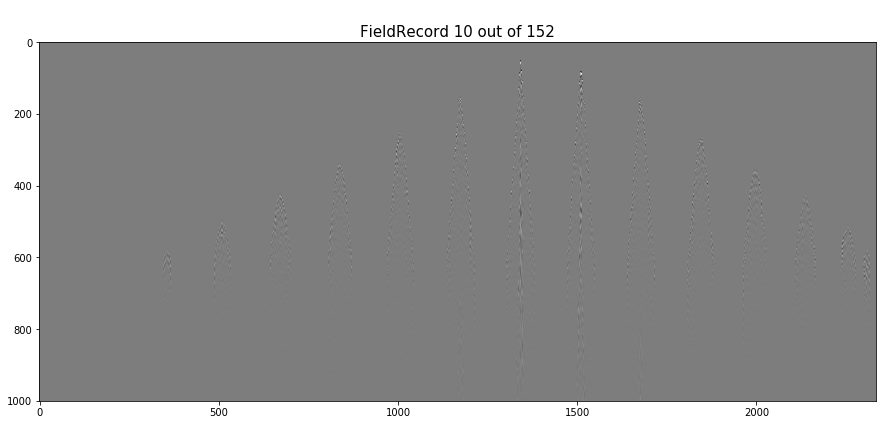

In [5]:
geometry.show_slide(loc=10)

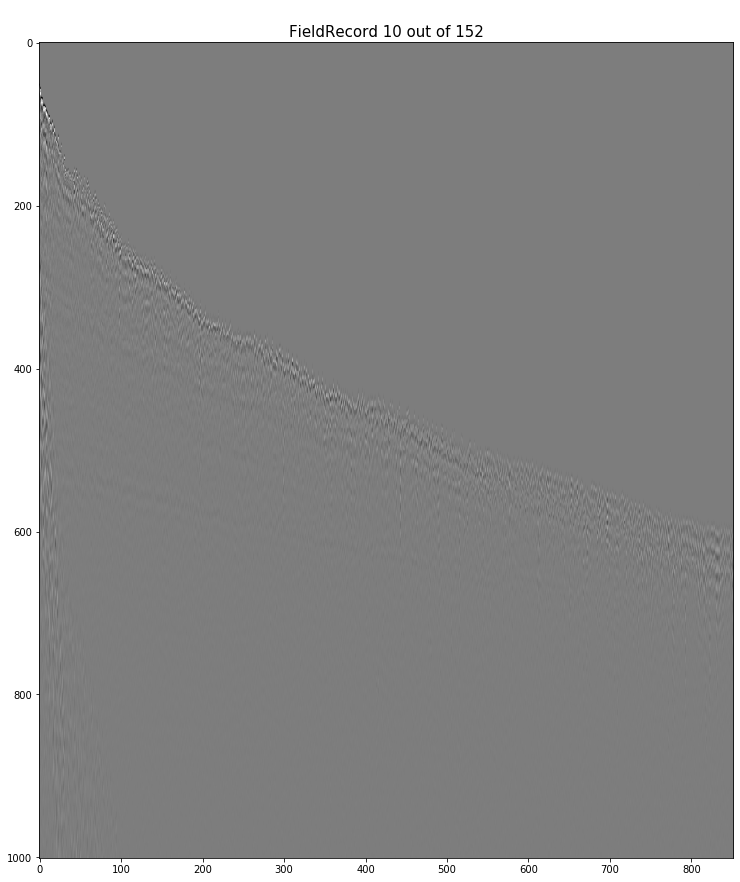

In [6]:
geometry.show_slide(loc=10, stable=True)

In [7]:
geometry.value_min, geometry.value_max, geometry.q01, geometry.q99

(-8620778.0, 8857641.0, -69485.7325, 71542.46499999985)

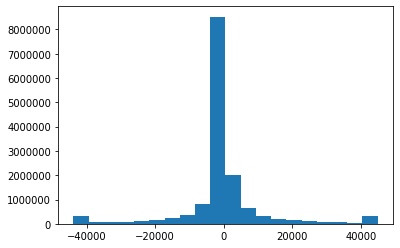

In [8]:
q1, q2 = np.quantile(geometry.trace_container, [0.02, 0.98])
data = np.clip(geometry.trace_container, q1, q2)
_ = plt.hist(data, bins=20)

In [9]:
hor = UnstructuredHorizon(
    '/data/seismic/CUBE_FBP/H2_Pal_ETALON_150ffid_picking.csv',
    geometry=geometry,
    names=['FieldRecord', 'TraceNumber', 'file_id', 'FIRST_BREAK_TIME'],
    columns=['FieldRecord', 'TraceNumber', 'FIRST_BREAK_TIME'],
    reader_params={'sep': ',', 'header': 0},
)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1155: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


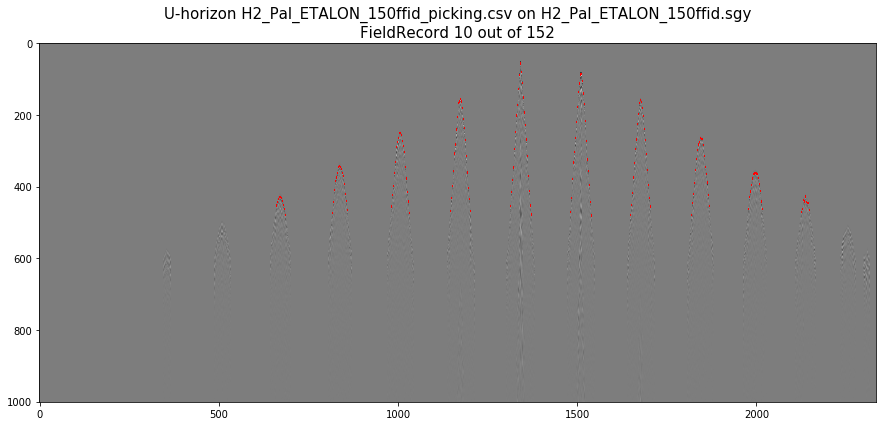

CPU times: user 833 ms, sys: 174 ms, total: 1.01 s
Wall time: 1 s


In [10]:
%%time
hor.show_slide(10, width=6, stable=False)

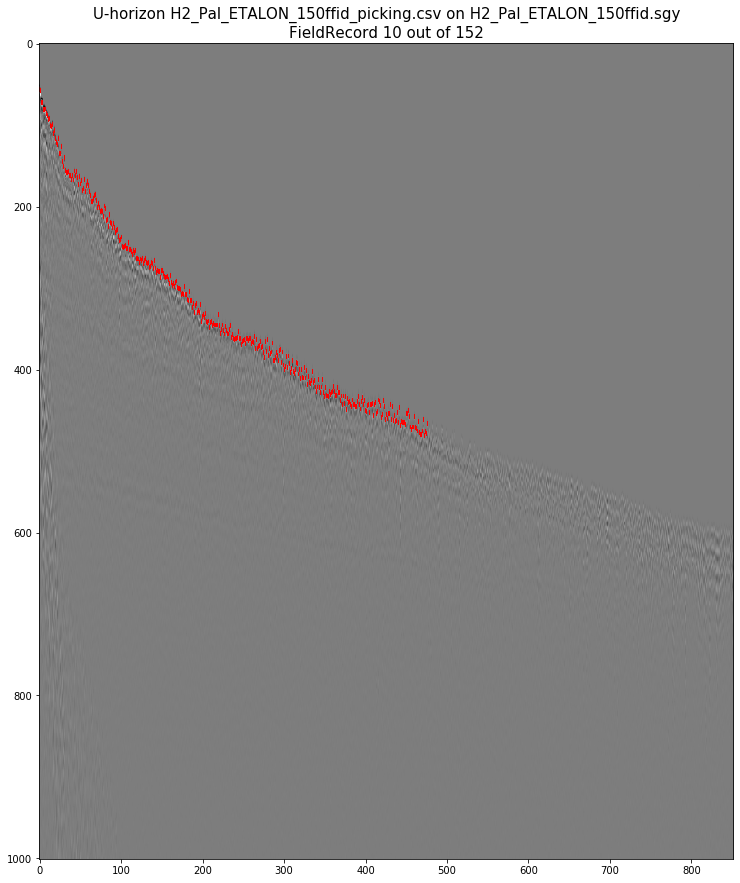

CPU times: user 707 ms, sys: 41.7 ms, total: 748 ms
Wall time: 748 ms


In [11]:
%%time
hor.show_slide(10, width=6, stable=True)

# 2D seismic

In [12]:
%%time
geometry = SeismicGeometry(
    '/data/seismic/CUBE_D2/Line_2786008_LMK.segy',
    headers=SeismicGeometry.HEADERS_PRE_FULL,
    index = ['TraceNumber'],
    collect_stats=True, spatial=False,
)


CPU times: user 181 ms, sys: 37.2 ms, total: 218 ms
Wall time: 207 ms


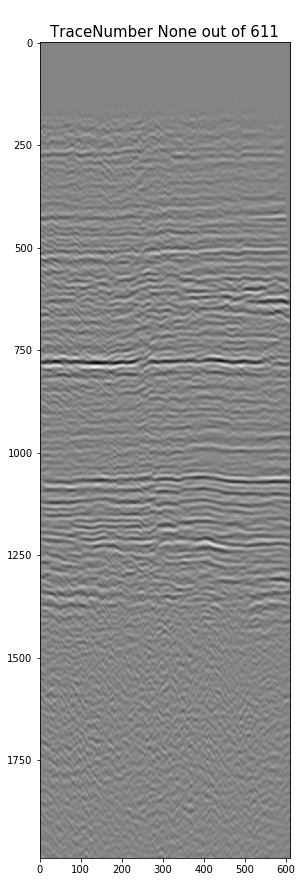

In [13]:
geometry.show_slide()

# Pre-stack

In [14]:
%%time
geometry = SeismicGeometry(
    '/data/seismic/CUBE_PRE/DN02B_SHOTS_LIFT1.sgy',
    headers=SeismicGeometry.HEADERS_PRE_FULL,
    index=['FieldRecord', 'TraceNumber'],
    collect_stats=True, spatial=True,
)


CPU times: user 59.7 s, sys: 2.7 s, total: 1min 2s
Wall time: 1min


In [15]:
geometry.value_min, geometry.value_max, geometry.q01, geometry.q99

(-26.666427612304688, 26.962158203125, -0.8794125497341155, 0.8795316696166964)

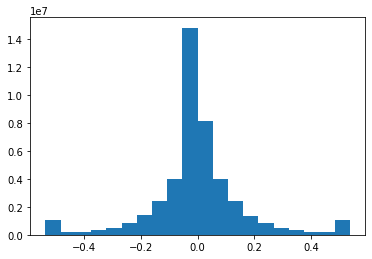

In [16]:
q1, q2 = np.quantile(geometry.trace_container, [0.02, 0.98])
data = np.clip(geometry.trace_container, q1, q2)
_ = plt.hist(data, bins=20)

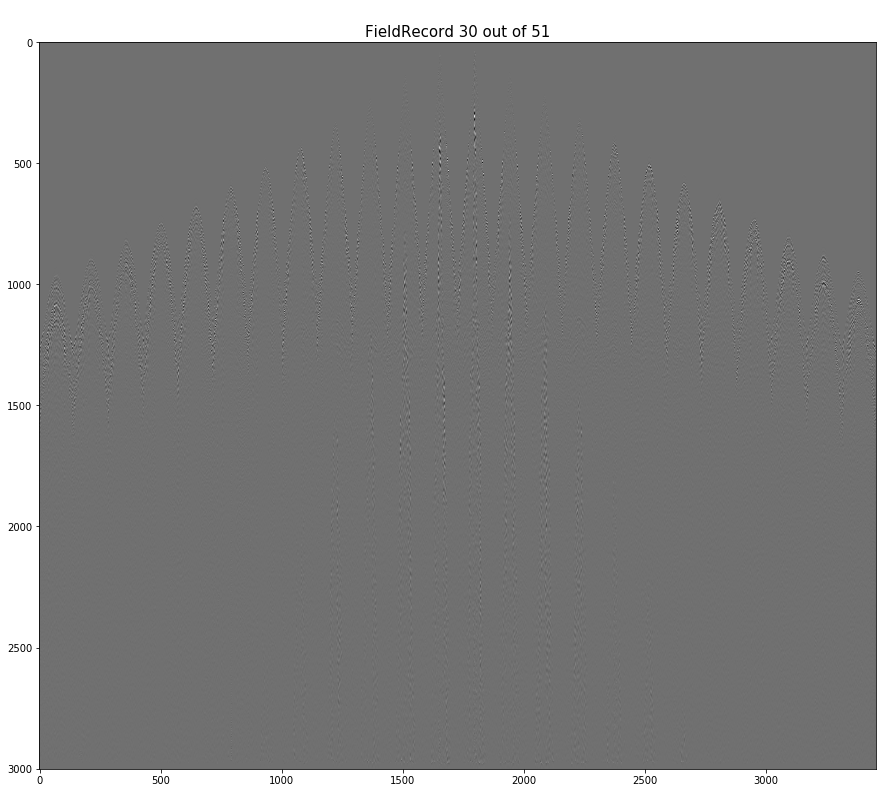

In [17]:
geometry.show_slide(loc=30, axis=0, stable=False)

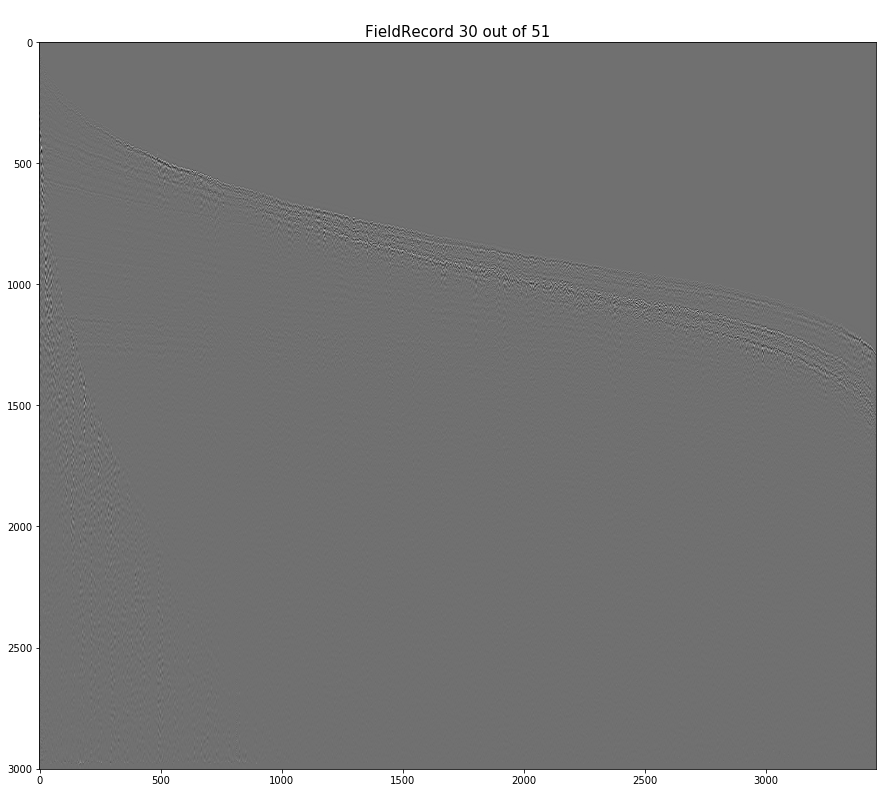

In [18]:
geometry.show_slide(loc=30, stable=True)

In [19]:
geometry.dataframe.columns

Index(['trace_index', 'TRACE_SEQUENCE_FILE', 'CDP', 'CDP_TRACE', 'offset'], dtype='object')

In [20]:
geometry.set_index(['CDP_TRACE', 'offset'])

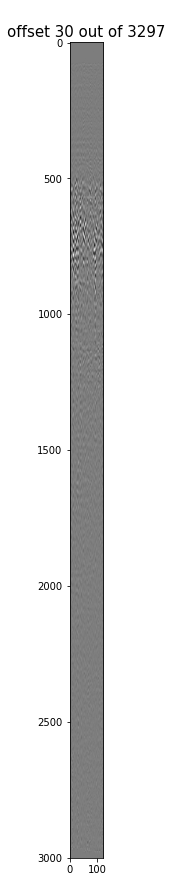

In [21]:
geometry.show_slide(loc=30, axis=1, stable=True)

# Post stask (inline/crossline index)

In [22]:
geometry = SeismicGeometry(
    '/data/seismic/CUBE_2/M_cube.sgy',
    headers=SeismicGeometry.HEADERS_POST_FULL,
    index = SeismicGeometry.INDEX_POST,
    collect_stats=True, spatial=True,
)

In [23]:
geometry.index

['INLINE_3D', 'CROSSLINE_3D']

In [24]:
%%time
hor = UnstructuredHorizon(
    '/data/seismic/CUBE_2/RAW/t0_B_anon',
    geometry=geometry,
    names=['INLINE', '_', 'INLINE_3D', 'XLINE', '__', 'CROSSLINE_3D', 'CDP_X', 'CDP_Y', 'height'],
)

CPU times: user 1.23 s, sys: 63.7 ms, total: 1.3 s
Wall time: 1.3 s


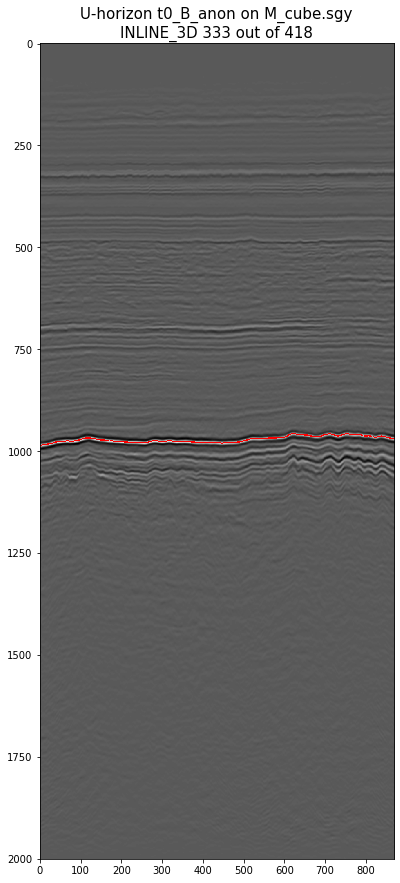

In [25]:
hor.show_slide(loc=333, axis=0)

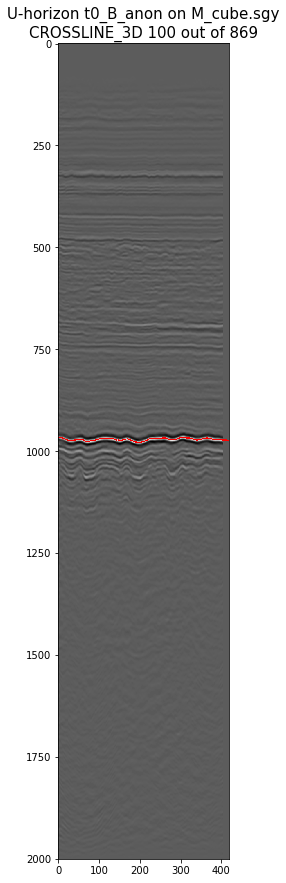

In [26]:
hor.show_slide(loc=100, axis=1)

# Post stack (cdp_x, cdp_y)

In [27]:
SeismicGeometry.INDEX_CDP

['CDP_Y', 'CDP_X']

In [28]:
geometry = SeismicGeometry(
    '/data/seismic/CUBE_1/E_anon.sgy',
    headers=SeismicGeometry.HEADERS_POST_FULL,
    index=SeismicGeometry.INDEX_CDP,
)

In [29]:
print(geometry)


Geometry for cube /data/seismic/CUBE_1/E_anon.sgy
Time delay and sample rate: 50, 2.0
Depth of one trace is: 1501
Current index: ['CDP_Y', 'CDP_X']
Shape: [2563 1409 1501]



In [30]:
%%time
hor = UnstructuredHorizon(
    '/data/seismic/CUBE_1/RAW/etp_B_anon',
    geometry=geometry,
    names=['INLINE', '_', 'INLINE_3D', 'XLINE', '__', 'CROSSLINE_3D', 'CDP_X', 'CDP_Y', 'height'],
)

CPU times: user 8.37 s, sys: 852 ms, total: 9.22 s
Wall time: 9.22 s


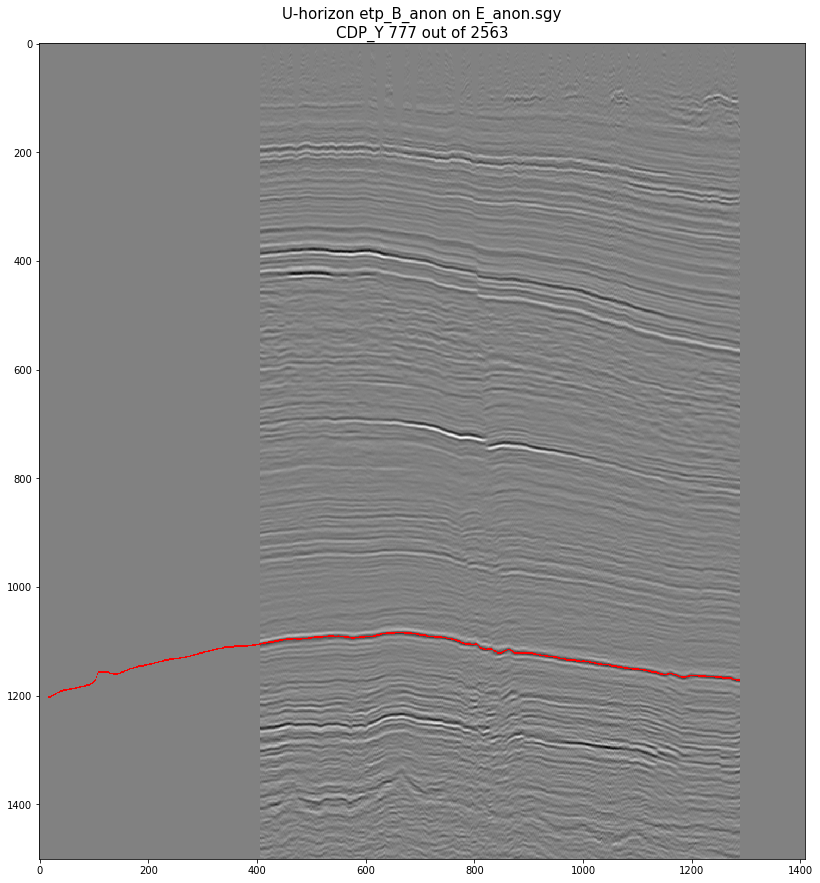

In [31]:
hor.show_slide(loc=777, axis=0)

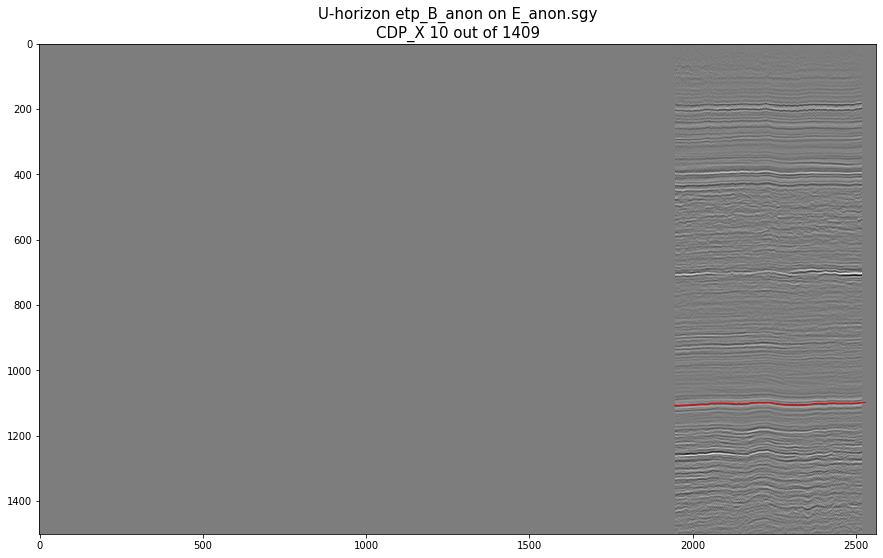

In [32]:
hor.show_slide(loc=10, axis=1)

# hdf5 example

In [33]:
%%time
geometry = SeismicGeometry('/data/seismic/CUBE_4/R_cube.hdf5')

CPU times: user 6.7 ms, sys: 234 ms, total: 240 ms
Wall time: 239 ms


In [34]:
%%time
grid = geometry.make_quality_grid((200, 200), plot=True, savepath='quality_grid.png')

../seismiqb/src/metrics.py:1264: RuntimeWarning: invalid value encountered in less_equal
  digitized[matrix <= bins[0]] = 1.0
../seismiqb/src/metrics.py:414: RuntimeWarning: Mean of empty slice
  quality_map = getattr(np, reduce_func)(quality_map, axis=-1)


CPU times: user 1min 1s, sys: 11.8 s, total: 1min 13s
Wall time: 1min 13s


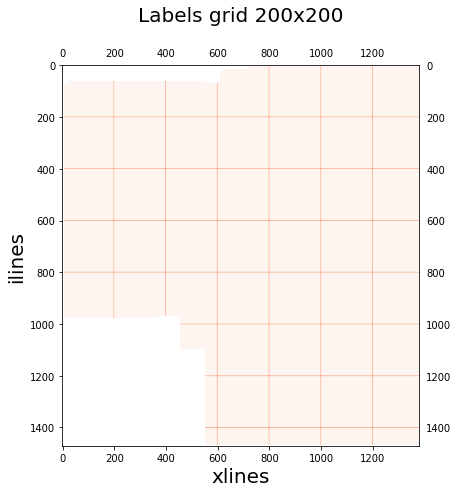

In [35]:
plot_image(geometry.quality_grid, 'Labels grid 200x200',
           rgb=True, savefig='./grid.png',
           cmap='Reds', interpolation='bilinear')

In [36]:
%%time
horizon = Horizon('/data/seismic/CUBE_4/BEST_HORIZONS/H_Kn.txt', geometry)
horizon.filter_points()

CPU times: user 2.16 s, sys: 107 ms, total: 2.27 s
Wall time: 2.27 s


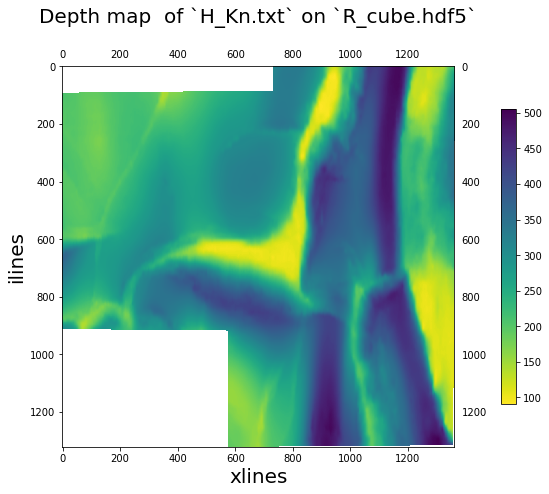

In [37]:
horizon.show(on_full=False, savefig='./depth_map.png')

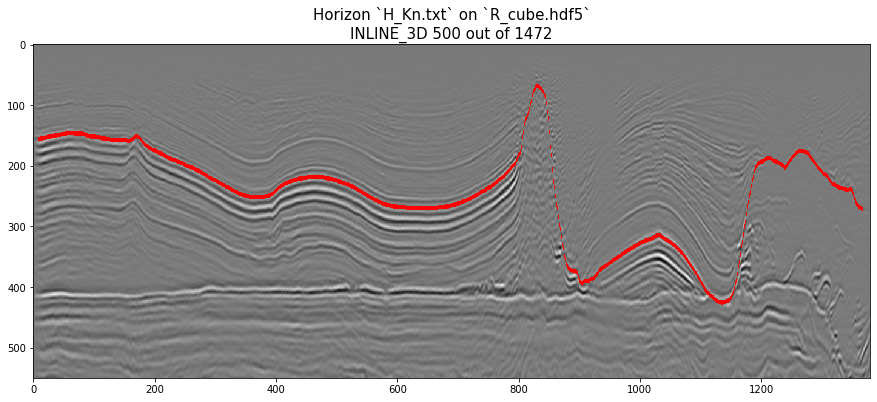

In [38]:
horizon.show_slide(500, width=7, axis=0, heights=slice(50, 600), savefig='./slide.png')

# ACF

In [39]:
path_raw = '/data/seismic/CUBE_ACF/H2_STK_Before_SCDEC.sgy'
path_lift = '/data/seismic/CUBE_ACF/H2_STK_SCDEC_200ms_16ms.sgy'
geometry_pre = SeismicGeometry(path_raw,
                               headers=SeismicGeometry.HEADERS_PRE_FULL + SeismicGeometry.HEADERS_POST_FULL,
                               index=SeismicGeometry.INDEX_POST,
                               collect_stats=True, spatial=False,
                              )

geometry_after = SeismicGeometry(path_lift,
                               headers=SeismicGeometry.HEADERS_PRE_FULL + SeismicGeometry.HEADERS_POST_FULL,
                               index=SeismicGeometry.INDEX_POST,
                               collect_stats=True, spatial=False,
                               )

In [40]:
from numba import njit, float32

@njit
def calc_root(arr, i):
    k = arr[i+1] - arr[i]
    b = arr[i] - k*i
    root = - (b / k)
    return root

@njit
def calc_ac_params(trace, num_shifts=-1):
    k0 = float32(0) # Shift at which AC changes sign first time
    trace_length = len(trace)
    ac = np.zeros(trace_length, dtype=np.float32) # AC values
    der = np.zeros(trace_length-1, dtype=np.float32) # AC derivative
    der_sign_changes = 0 # Number of times AC derivative changes sign
    amps = np.zeros(2, dtype=np.float32) # Container for amplitudes

    ac[0] = np.dot(trace, trace) # Calculate AC for k=0 out of loop
    k = 1 # AC shift
    while True:
        ac[k] = np.dot(trace[k:], trace[:-k])

        if k0 == 0 and np.sign(ac[k]) != np.sign(ac[k-1]):
            k0 = calc_root(ac, k-1)

        der[k-1] = ac[k] - ac[k-1]

        if k > 1:
            if np.sign(der[k-1]) != np.sign(der[k-2]):
                der_sign_changes += 1
        k += 1

        if der_sign_changes >= 2 and k >= num_shifts:
            break
    amps[0] = np.min(ac[int(k0):])
    amps[1] = np.max(ac[int(k0):])
    amps = amps / ac[0]
    return k0, amps

@njit
def _compare_ac_params(trace_before, trace_after, num_shifts=-1):
    k0_before, amps_before = calc_ac_params(trace_before, num_shifts)
    k0_after, amps_after = calc_ac_params(trace_after, num_shifts)
    k0_diff = (k0_after - k0_before) / max(1, k0_before) * 100
    amps_diff = (amps_after - amps_before) / amps_before * 100

    return k0_diff, amps_diff[0], amps_diff[1]

def compare_ac_params(trace_before, trace_after, window=None, num_shifts=-1):
    if window:
        trace_before = trace_before[window]
        trace_after = trace_after[window]
        
    return _compare_ac_params(trace_before, trace_after, num_shifts=num_shifts)

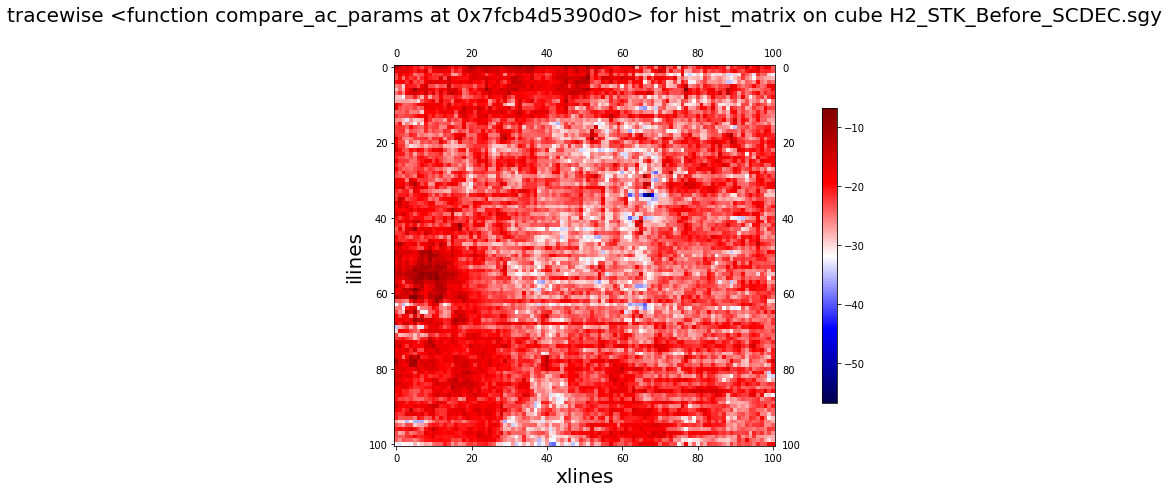

CPU times: user 3.75 s, sys: 276 ms, total: 4.02 s
Wall time: 3.88 s


In [41]:
%%time
gm = GeometryMetrics((geometry_pre, geometry_after))
metric = gm.evaluate(
    'tracewise', func=compare_ac_params, l=3, agg=0, num_shifts=10,
    plot=True, plot_kwargs={'cmap' :'seismic'},
)

In [42]:
def diff_mean(array_1, array_2):
#     return np.max(array_1 - array_2)
    return np.mean(array_1) - np.mean(array_2)

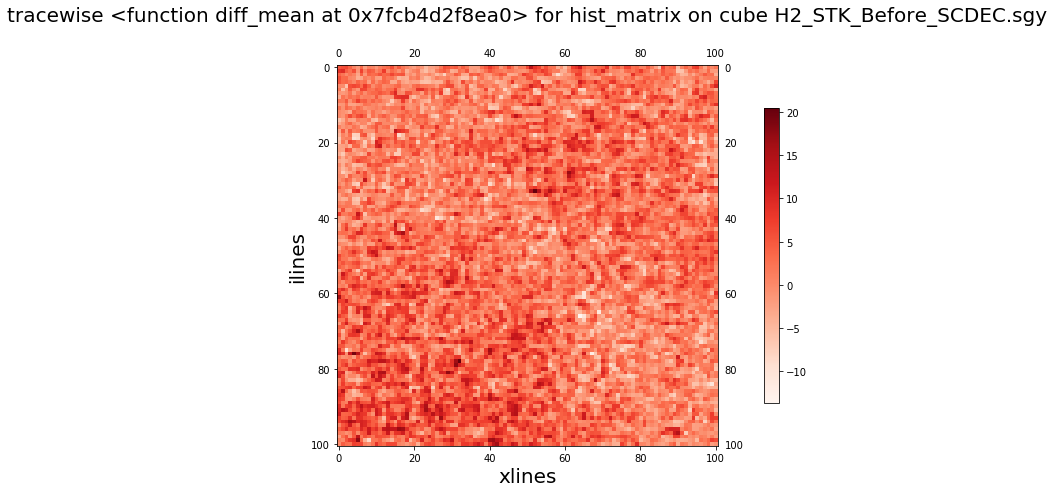

CPU times: user 1.96 s, sys: 314 ms, total: 2.27 s
Wall time: 1.99 s


In [43]:
%%time
gm = GeometryMetrics((geometry_pre, geometry_after))
metric = gm.evaluate(
    'tracewise', func=diff_mean, l=1, agg=None,
    plot=True, plot_kwargs={'cmap' :'Reds'},
)

# Metrics example

In [44]:
%%time
geometry = SeismicGeometry('/data/seismic/CUBE_1/E_anon.hdf5')

CPU times: user 15.7 ms, sys: 422 ms, total: 438 ms
Wall time: 435 ms


In [45]:
%%time
grid = geometry.make_quality_grid((20, 200), plot=True, savepath='quality_grid.png')

../seismiqb/src/metrics.py:1264: RuntimeWarning: invalid value encountered in less_equal
  digitized[matrix <= bins[0]] = 1.0
../seismiqb/src/metrics.py:414: RuntimeWarning: Mean of empty slice
  quality_map = getattr(np, reduce_func)(quality_map, axis=-1)


CPU times: user 1min 42s, sys: 29.4 s, total: 2min 11s
Wall time: 2min 11s


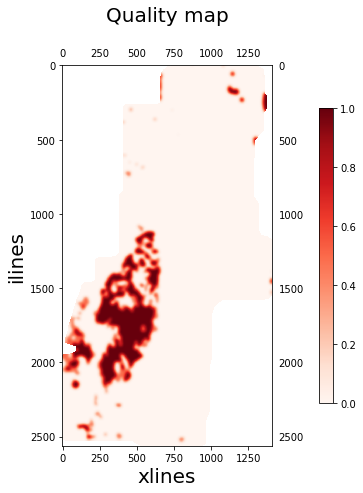

In [46]:
plot_image(geometry.quality_map, 'Quality map', cmap='Reds')

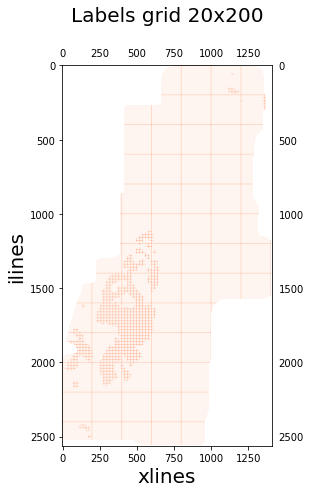

In [47]:
plot_image(geometry.quality_grid, 'Labels grid 20x200',
           rgb=True, cmap='Reds', interpolation='bilinear')

In [48]:
%%time
horizon = Horizon('/data/seismic/CUBE_1/RAW/etp_B_anon', geometry)
horizon.filter_points()

CPU times: user 3.21 s, sys: 340 ms, total: 3.55 s
Wall time: 3.55 s


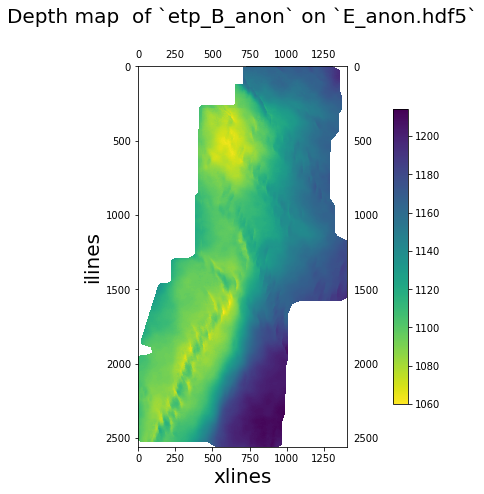

In [49]:
horizon.show(on_full=False, savefig='./depth_map.png')

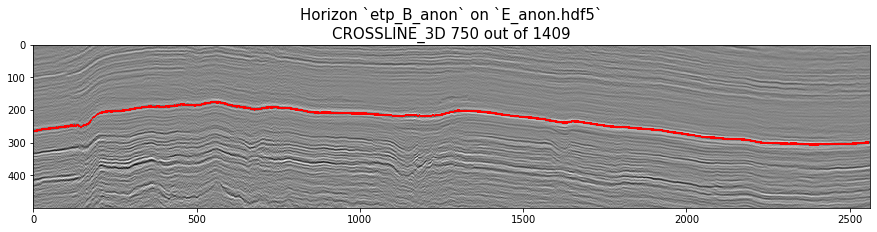

In [50]:
horizon.show_slide(750, width=7, axis=1, heights=slice(900, 1400), savefig='./slide.png')

In [51]:
hm = HorizonMetrics(horizon)

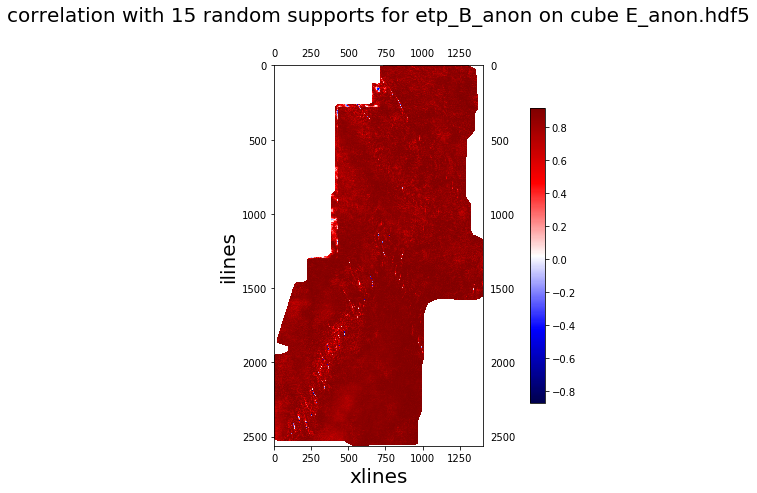

CPU times: user 10.1 s, sys: 5.53 s, total: 15.6 s
Wall time: 15.6 s


In [52]:
%%time
metric = hm.evaluate('support_corrs', supports=15, agg='mean', plot=True)

../seismiqb/src/metrics.py:527: RuntimeWarning: invalid value encountered in true_divide
  self._probs = hist_matrix / np.sum(hist_matrix, axis=-1, keepdims=True) + self.EPS
../seismiqb/src/metrics.py:1264: RuntimeWarning: invalid value encountered in less_equal
  digitized[matrix <= bins[0]] = 1.0
../seismiqb/src/metrics.py:414: RuntimeWarning: Mean of empty slice
  quality_map = getattr(np, reduce_func)(quality_map, axis=-1)


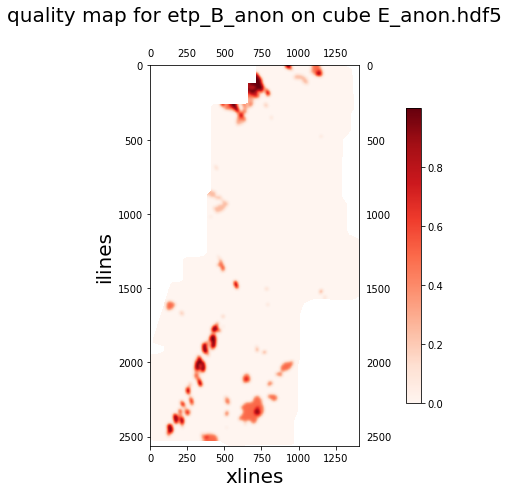

CPU times: user 9min 59s, sys: 51 s, total: 10min 50s
Wall time: 10min 50s


In [53]:
%%time
quality_map = hm.evaluate('quality_map', quantiles=[0.03], agg=None,
                           metric_names=['support_emd', 'support_btch', 'support_js', 'support_hellinger'],
                           plot=True)

# Compare two horizons

In [54]:
%%time
horizon_2 = Horizon('/data/seismic/CUBE_1/RAW/etp_BP10_anon', geometry)
horizon_2.filter_points()

CPU times: user 3.58 s, sys: 139 ms, total: 3.72 s
Wall time: 3.74 s


In [55]:
hm = HorizonMetrics((horizon, horizon_2))


Comparing horizons:       etp_B_anon
                          etp_BP10_anon
—————————————————————————————————————————————

Rate in 5ms:                              0.0
Mean/std of errors:          149.7 /    7.127
Mean/std of abs errors:      149.7 /    7.127
Max error/abd error:         174.0 /    174.0
—————————————————————————————————————————————

Lengths of horizons:                  2424324
                                      2424324
—————————————————————————————————————————————
Average heights of horizons:         1.13e+03
                                        980.5
—————————————————————————————————————————————
Coverage of horizons:                  0.9953
                                       0.9953
—————————————————————————————————————————————
Solidity of horizons:                     1.0
                                          1.0
—————————————————————————————————————————————
Number of holes in horizons:                0
                                            0


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


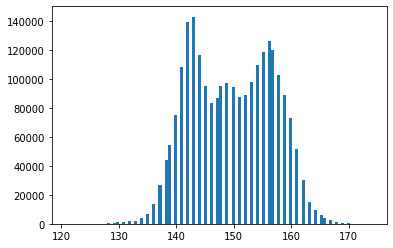

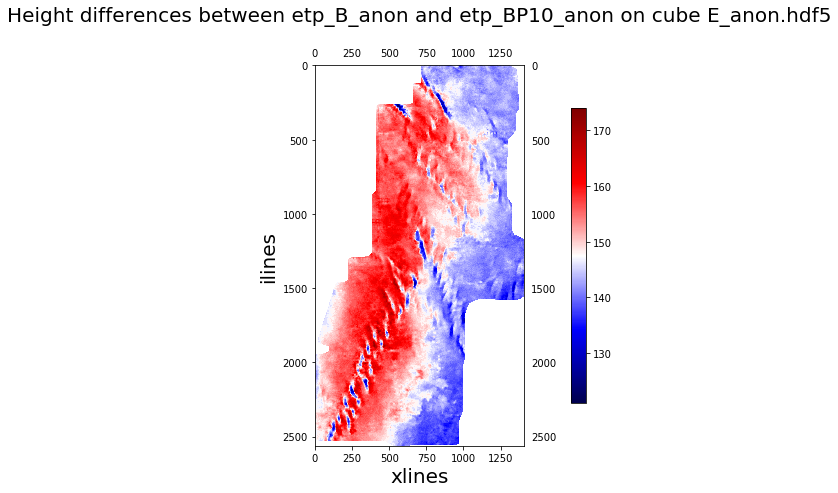

In [56]:
l1 = hm.evaluate('compare', agg=None, plot=True)